# Data Analysis

For understanding the bibliographic catalogue data of the Swissbib platform, the project team has generated a sample .json file with a big amount of representative records. This chapter shows the analysis of this data delivery.

## Table of Contents

- [Sample Records Analysis](#Sample-Records-Analysis)
    - [Book](#Book)
    - [Music](#Music)
    - [Video Material](#Video-Material)
    - [Map](#Map)
    - [Periodical](#Periodical)
    - [Collection](#Collection)
    - [Computer File](#Computer-File)
- [General Observation](#General-Observation)
- [Attribute Analysis](#Attribute-Analysis)
    - [Table of Contents of Attribute Analysis](#Table-of-Contents-of-Attribute-Analysis)
- [Metadata Handover](#Metadata-Handover)
- [Summary](#Summary)

## Sample Records Analysis

In this section, the data file is loaded and some sample data records are shown.

In [1]:
import os
import json

records = []
path_data = './data'
path_goldstandard = './daten_goldstandard'

for line in open(os.path.join(path_data, 'job7r4A1.json'), 'r'):
    records.append(json.loads(line))

print('Number of data records loaded', len(records))

Number of data records loaded 183407


In [2]:
import pandas as pd

# Generate Pandas DataFrame object out of the raw data
df = pd.DataFrame(records)

# Extend display to number of columns of DataFrame
pd.options.display.max_columns = len(df.columns)

df.head()

,docid,035liste,isbn,ttlfull,ttlpart,person,corporate,pubyear,decade,century,exactDate,edition,part,pages,volumes,pubinit,pubword,scale,coordinate,doi,ismn,musicid,format
0,554061449,"[(OCoLC)1085491204, (IDSBB)006899773]",[],"{'245': ['Die Feist von Kienberg', 'eine Wasen...","{'245': ['Die Feist von Kienberg', 'eine Wasen...","{'100': ['SchluchterAndré'], '245c': ['André S...",{},1992,1992,1992,1992,,[],[S. 102-114],[S. 102-114],[],[],,[],[],[],,[BK020000]
1,554061481,"[(OCoLC)1085491341, (IDSBB)006899983]",[],{'245': ['Reimereien']},{'245': ['Reimereien']},"{'100': ['NaegeliWerner'], '245c': ['von Werne...",{},1986,1986,1986,1986,,[],[43 S.],[43 S.],[],[],,[],[],[],,[BK020000]
2,554061503,"[(OCoLC)1085491299, (IDSBB)006899959]",[],{'245': ['Efficax antidotum ad matrimonia mixt...,{'245': ['Efficax antidotum ad matrimonia mixt...,"{'100': ['KellyM.V.'], '700': ['GeniesseJ.B.']...",{},1923,1923,1923,1923,,[],[75 p.],[75 p.],[],[],,[],[],[],,[BK020000]
3,554061511,"[(OCoLC)1085491268, (IDSBB)006896614]",[],"{'245': ['Probleme der Inflationsbekämpfung', ...","{'245': ['Probleme der Inflationsbekämpfung', ...","{'100': ['WegelinWalter'], '245c': ['']}",{},1947,1947,1947,1947,,[],[24 S.],[24 S.],[],[],,[],[],[],,[BK020000]
4,55406152X,"[(OCoLC)1085491079, (IDSBB)006896866]",[],{'245': ['[Poems]']},{'245': ['[Poems]']},"{'100': ['OberlinUrs'], '245c': ['Urs Oberlin ...",{},1991,1991,1991,1991,,[],[p. 14-15],[p. 14-15],[],[],,[],[],[],,[BK020000]


In [3]:
print('Number of records {:d}, number of attributes per record {:d}.\n'.format(
    len(df), len(df.columns)))

df.info()

Number of records 183407, number of attributes per record 23.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183407 entries, 0 to 183406
Data columns (total 23 columns):
docid         183407 non-null object
035liste      183407 non-null object
isbn          183407 non-null object
ttlfull       183407 non-null object
ttlpart       183407 non-null object
person        183407 non-null object
corporate     183407 non-null object
pubyear       183407 non-null object
decade        183407 non-null object
century       183407 non-null object
exactDate     183407 non-null object
edition       183407 non-null object
part          183407 non-null object
pages         183407 non-null object
volumes       183407 non-null object
pubinit       183407 non-null object
pubword       183407 non-null object
scale         183407 non-null object
coordinate    183407 non-null object
doi           183407 non-null object
ismn          183407 non-null object
musicid       183407 non-null object
format      

Swissbib data describes different kinds of bibliographic units, see [format](#format). The following subsections show some sample data for such units. The format is interpreted roughly in these subsections, compare Swissbib's [format codes](http://www.swissbib.org/wiki/index.php?title=Filtering#format_codes) [[FeatWiki](./A_References.ipynb#feature_deduplication_wiki)].

In [4]:
df.format.str[0].str[:2].unique()

array(['BK', 'MU', 'VM', 'MP', 'CR', 'CL', 'CF', nan], dtype=object)

### Book

A format code starting with $\texttt{BK}$ stands for a bibliographic unit of a book or an article. A sample record is shown below.

In [5]:
df.loc[df[df.format.str[0].str[:2]=='BK'].index[0]]

docid                                                 554061449
035liste                  [(OCoLC)1085491204, (IDSBB)006899773]
isbn                                                         []
ttlfull       {'245': ['Die Feist von Kienberg', 'eine Wasen...
ttlpart       {'245': ['Die Feist von Kienberg', 'eine Wasen...
person        {'100': ['SchluchterAndré'], '245c': ['André S...
corporate                                                    {}
pubyear                                                1992    
decade                                                     1992
century                                                    1992
exactDate                                              1992    
edition                                                        
part                                                         []
pages                                              [S. 102-114]
volumes                                            [S. 102-114]
pubinit                                 

### Music

A format code starting with $\texttt{MU}$ stands for a bibliographic unit that is related to music. A sample record is shown below.

In [6]:
df.loc[df[df.format.str[0].str[:2]=='MU'].index[0]]

docid                                                 554098806
035liste                  [(OCoLC)1085495414, (IDSBB)007052696]
isbn                                                         []
ttlfull                             {'245': ['Violin sonatas']}
ttlpart                             {'245': ['Violin sonatas']}
person        {'100': ['BrahmsJohannes1833-1897(DE-588)11851...
corporate                                                    {}
pubyear                                                20182018
decade                                                     2018
century                                                    2018
exactDate                                              20182018
edition                                                        
part                                                         []
pages                                            [1 CD (69:42)]
volumes                                          [1 CD (69:42)]
pubinit                                 

### Video Material

A format code starting with $\texttt{VM}$ represents some film material. A sample record is shown below.

In [7]:
df.loc[df[df.format.str[0].str[:2]=='VM'].index[0]]

docid                                                 554098911
035liste      [(OCoLC)1065768412, (IDSBB)007052702, (OCoLC)1...
isbn                         [978-3-946274-20-9, 3-946274-20-X]
ttlfull       {'245': ['Kunst und Gemüse, A. Hipler', 'Art a...
ttlpart       {'245': ['Kunst und Gemüse, A. Hipler', 'Art a...
person        {'100': [], '700': ['SchlingensiefChristoph196...
corporate                                                    {}
pubyear                                                20182008
decade                                                     2018
century                                                    2018
exactDate                                              20182008
edition                                                        
part                                                     [2004]
pages                                  [2 DVD-Videos (283 min)]
volumes                                [2 DVD-Videos (283 min)]
pubinit                                 

### Map

A format code starting with $\texttt{MP}$ is a map. A sample record is shown below.

In [8]:
df.loc[df[df.format.str[0].str[:2]=='MP'].index[0]]

docid                                                 554099039
035liste                  [(OCoLC)1085495396, (IDSBB)007052708]
isbn                                                         []
ttlfull       {'245': ['Nova descriptio Comitatus Hollandiæ'...
ttlpart       {'245': ['Nova descriptio Comitatus Hollandiæ'...
person        {'100': ['BlaeuWillem Janszoon1571-1638(DE-588...
corporate                                                    {}
pubyear                                                19931604
decade                                                     1993
century                                                    1993
exactDate                                              19931604
edition                                               Facsimile
part                                                         []
pages                                                 [1 Karte]
volumes                                               [1 Karte]
pubinit                                 

### Periodical

A format code starting with $\texttt{CR}$ is a bibliographic unit of a periodical. A sample record is shown below.

In [9]:
df.loc[df[df.format.str[0].str[:2]=='CR'].index[0]]

docid                                                 55409939X
035liste                   [(OCoLC)699516877, (IDSBB)007052728]
isbn                                                [1533-4406]
ttlfull       {'245': ['The new England journal of medicine ...
ttlpart       {'245': ['The new England journal of medicine ...
person                                {'100': [], '245c': ['']}
corporate                                                    {}
pubyear                                                18121826
decade                                                     1812
century                                                    1812
exactDate                                              18121826
edition                                                        
part                                                         []
pages                                        [Online-Ressource]
volumes                                      [Online-Ressource]
pubinit                                 

### Collection

A format code starting with $\texttt{CL}$ is a collection. A sample record is shown below.

In [10]:
df.loc[df[df.format.str[0].str[:2]=='CL'].index[0]]

docid                                                 554101610
035liste                  [(OCoLC)1085510940, (IDSBB)007052979]
isbn                                                         []
ttlfull       {'245': ['[St. Gallischer Hilfsverein - Sankt ...
ttlpart       {'245': ['[St. Gallischer Hilfsverein - Sankt ...
person                                {'100': [], '245c': ['']}
corporate               {'110': ['St. Gallischer Hilfsverein']}
pubyear                                                20179999
decade                                                     2017
century                                                    2017
exactDate                                              20179999
edition                                                        
part                                                         []
pages                                                 [1 Mappe]
volumes                                               [1 Mappe]
pubinit                                 

### Computer File

A format code starting with $\texttt{CF}$ is a placeholder for a computer file on any kind of storage. A sample record is shown below.

In [11]:
df.loc[df[df.format.str[0].str[:2]=='CF'].index[0]]

docid                                                 554144301
035liste                   [(IDSBB)007008154, (RERO)R007245313]
isbn                                                         []
ttlfull       {'245': ['Ice Age 4', 'voll verschoben : die a...
ttlpart       {'245': ['Ice Age 4', 'voll verschoben : die a...
person                                {'100': [], '245c': ['']}
corporate                                                    {}
pubyear                                                2012    
decade                                                     2012
century                                                    2012
exactDate                                              2012    
edition                                                        
part                                                         []
pages                                         [1 Speicherkarte]
volumes                                       [1 Speicherkarte]
pubinit                                 

## General Observation

As can be observed in the sample records displayed above, the attributes of the records are stored in basic Python datatypes like strings, lists (of strings), and dictionaries. A look into the raw data file confirms this observation.

In [12]:
! head -n 2 ./data/job7r4A1.json

{"docid":"554061449","035liste":["(OCoLC)1085491204","(IDSBB)006899773"],"isbn":[],"ttlfull":{"245":["Die Feist von Kienberg","eine Wasenmeisterfamilie im Ancien Régime zwischen Ehrbarkeit und Delinquenz"]},"ttlpart":{"245":["Die Feist von Kienberg","eine Wasenmeisterfamilie im Ancien Régime zwischen Ehrbarkeit und Delinquenz"]},"person":{"100":["SchluchterAndré"],"245c":["André Schluchter"]},"corporate":{},"pubyear":"1992    ","decade":"1992","century":"1992","exactDate":"1992    ","edition":"","part":[],"pages":["S. 102-114"],"volumes":["S. 102-114"],"pubinit":[],"pubword":[],"scale":"","coordinate":[],"doi":[],"ismn":[],"musicid":"","format":["BK020000"]}
{"docid":"554061481","035liste":["(OCoLC)1085491341","(IDSBB)006899983"],"isbn":[],"ttlfull":{"245":["Reimereien"]},"ttlpart":{"245":["Reimereien"]},"person":{"100":["NaegeliWerner"],"245c":["von Werner Naegeli"]},"corporate":{},"pubyear":"1986    ","decade":"1986","century":"1986","exactDate":"1986    ","edition":"","part":[],"pag

A specific analysis on each attribute, its meaning and contents will be done as a next step. For the upcoming analysis, each attribute of the data records is assigned to its specific group type. This is done with the help of a global dictionary variable $\texttt{columns}\_\texttt{metadata}\_\texttt{dict}$.

In [13]:
columns_metadata_dict = {}

## Attribute Analysis

This section analyses the attributes provided by the Swissbib data extracts. The extracted data is used as a basis for the machine learning models in the capstone project. The attributes are based on the MARC 21 Format for Bibliographic Data [[MARC](./A_References.ipynb#marc21)] and are documented on a Swissbib wikipedia page [[FeatWiki](./A_References.ipynb#feature_deduplication_wiki)].

In [14]:
df.columns

Index(['docid', '035liste', 'isbn', 'ttlfull', 'ttlpart', 'person',
       'corporate', 'pubyear', 'decade', 'century', 'exactDate', 'edition',
       'part', 'pages', 'volumes', 'pubinit', 'pubword', 'scale', 'coordinate',
       'doi', 'ismn', 'musicid', 'format'],
      dtype='object')

This section provides and uses some functions that have been written for supporting the analysis of the attributes as well as for data preprocessing in the upcoming chapters. These functions have been defined in separate code files.

- [data_analysis_funcs.py](./data_analysis_funcs.py)
- [data_preparation_funcs.py](./data_preparation_funcs.py)

In [15]:
import data_analysis_funcs as daf
import data_preparation_funcs as dpf

### Table of Contents of Attribute Analysis

- [035liste](#035liste)
- [century](#century)
- [coordinate](#coordinate)
- [corporate](#corporate)
- [decade](#decade)
- [docid](#docid)
- [doi](#doi)
- [edition](#edition)
- [exactDate](#exactDate)
- [format](#format)
- [isbn](#isbn)
- [ismn](#ismn)
- [musicid](#musicid)
- [pages](#pages)
- [part](#part)
- [person](#person)
- [pubinit](#pubinit)
- [pubword](#pubword)
- [pubyear](#pubyear)
- [scale](#scale)
- [ttlfull](#ttlfull)
- [ttlpart](#ttlpart)
- [volumes](#volumes)

### 035liste

In [16]:
columns_metadata_dict['list_columns'] = ['035liste']

Attribute $\texttt{035liste}$ holds a list of identifiers from the originating library of a bibliographic unit, see [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. Each record of the Swissbib data holds at least one identifier. Some examples are shown below.

In [17]:
_, _ = daf.find_empty_in_column(df, columns_metadata_dict, '035liste')

Number of records with filled 035liste 183407, with missing 035liste 0 => 100.0%


In [18]:
df['035liste'].apply(lambda x : len(x)).sort_values().head(5)

83463     1
150669    1
150668    1
150667    1
150666    1
Name: 035liste, dtype: int64

In [19]:
df['035liste'].apply(lambda x : len(x)).sort_values().tail(10)

144185    20
54084     21
30793     21
136608    21
61603     21
14755     21
49974     22
139972    22
139191    23
124359    23
Name: 035liste, dtype: int64

In [20]:
print('Some sample identifiers:')
df['035liste'].sample(n=10)

Some sample identifiers:


36439                                        [(KBTG)466579]
180354                 [(NEBIS)000145141, (RERO)R274285660]
96247            [(RETROS)oai:agora.ch:inc-001:1982:0::163]
105260                [(OCoLC)1087486838, (NEBIS)011362484]
116970       [(SERSOL)ssib034729991, (WaSeSS)ssib034729991]
111927                  [(OCoLC)1088425343, (SBT)000915556]
103888                [(OCoLC)1089442369, (NEBIS)011357942]
119155       [(SERSOL)ssib034730534, (WaSeSS)ssib034730534]
33098     [(VAUD)991021213256502852, (CKB)41100000000105...
178947                                   [(RERO)R008902342]
Name: 035liste, dtype: object

Attribute $\texttt{035liste}$ is the central attribute for finding duplicates in the training data of the Swissbib's goldstandard. This process will be explained and implemented in chapter [Goldstandard and Data Preparation](./2_GoldstandardDataPreparation.ipynb).

### century

In [21]:
columns_metadata_dict['strings_columns'] = ['century']

In [22]:
idx_century_filled, idx_century_empty = daf.find_empty_in_column(df, columns_metadata_dict, 'century')

daf.two_examples(df, idx_century_filled, idx_century_empty)

Number of records with filled century 183407, with missing century 0 => 100.0%

EMPTY - None

FILLED - index 0 

docid                                                 554061449
035liste                  [(OCoLC)1085491204, (IDSBB)006899773]
isbn                                                         []
ttlfull       {'245': ['Die Feist von Kienberg', 'eine Wasen...
ttlpart       {'245': ['Die Feist von Kienberg', 'eine Wasen...
person        {'100': ['SchluchterAndré'], '245c': ['André S...
corporate                                                    {}
pubyear                                                1992    
decade                                                     1992
century                                                    1992
exactDate                                              1992    
edition                                                        
part                                                         []
pages                                              [S. 

Attribute $\texttt{century}$ holds information on the year of origin of the bibliographic unit [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. The attribute holds strings of length 4 that can predominantly be interpreted as year-dates. Some examples and the top-most quantity distribution are shown below.

In [23]:
df['century'].sample(n=15)

94469     2018
148842    2011
136468    2019
84255     2017
119358    uuuu
180458    1864
173150    1959
144060    1892
90482     2018
91522     2017
19041     2018
177774    2016
60448     1931
158260    2017
97390     2005
Name: century, dtype: object

In [24]:
df.century.value_counts(normalize=True).head(10)

2018    0.208389
2019    0.086785
2017    0.046350
uuuu    0.036236
2016    0.025223
1999    0.020201
2015    0.019879
2014    0.018156
2012    0.016286
2013    0.015616
Name: century, dtype: float64

If the year-date is unclear to some extent or no year-date of the unit is registered, letter 'u' is used as a placeholder of the unknown digit.

In [25]:
df.century[df.century.str.contains('u')].unique()

array(['uuuu', 'u826', '193u', '197u', '192u', '19uu', '200u', '198u',
       '189u', '188u', '18uu', '201u', '20uu', 'u829', '195u', '218u',
       '196u', '17uu', '1uuu', '199u', 'u611', '191u', '190u', 'u713',
       'u999', '194u', 'u693', '186u', '184u', '15uu', 'uuu1'],
      dtype=object)

The above statement results in the same array like the following regular expression.

In [26]:
df.century[df.century.str.contains('[^0-9]')].unique()

array(['uuuu', 'u826', '193u', '197u', '192u', '19uu', '200u', '198u',
       '189u', '188u', '18uu', '201u', '20uu', 'u829', '195u', '218u',
       '196u', '17uu', '1uuu', '199u', 'u611', '191u', '190u', 'u713',
       'u999', '194u', 'u693', '186u', '184u', '15uu', 'uuu1'],
      dtype=object)

In [27]:
df.century[~df.century.str.contains('[u]')].unique()

array(['1992', '1986', '1923', '1947', '1991', '1967', '1950', '1985',
       '1983', '1942', '1883', '1990', '1984', '1989', '1993', '1961',
       '1940', '1981', '1988', '1858', '1978', '1977', '1880', '1945',
       '1963', '1912', '1884', '1937', '1956', '1943', '1916', '1960',
       '1980', '1936', '1906', '1987', '1955', '1944', '1953', '1930',
       '1903', '1913', '1938', '1895', '1905', '1920', '1918', '1857',
       '1928', '1881', '1932', '1900', '1924', '1915', '1931', '1927',
       '1919', '1896', '1922', '1871', '1926', '1939', '1907', '1776',
       '1873', '1893', '1968', '1975', '1946', '1833', '1855', '1949',
       '1962', '1971', '1959', '1966', '1862', '1898', '1901', '1904',
       '1902', '1951', '1909', '1929', '1921', '1882', '1964', '1911',
       '1957', '1897', '1910', '1867', '1914', '1908', '1958', '1934',
       '1933', '1872', '1845', '1979', '1954', '1885', '1810', '1891',
       '1869', '1876', '1889', '1836', '1952', '1935', '1948', '1917',
      

The following graph shows the publishing activity of Western European literature.

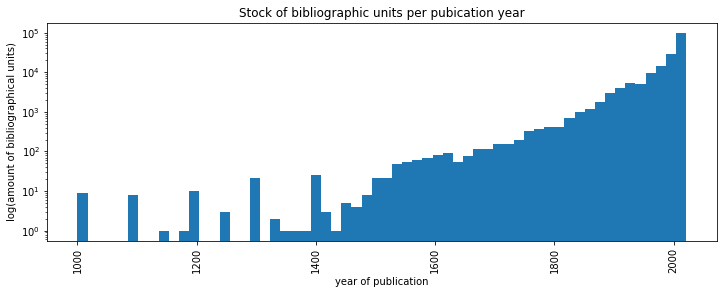

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))

plt.hist(df.century[~df.century.str.contains('[u]')].astype(int), bins=60, log=True)
plt.xticks(rotation='vertical')
plt.title('Stock of bibliographic units per pubication year')
plt.xlabel('year of publication')
plt.ylabel('log(amount of bibliographical units)')
plt.show()

The attribute is taken over to the feature matrix without an extra processing in [Goldstandard and Data Preparation](./2_GoldstandardDataPreparation.ipynb).

In [29]:
columns_metadata_dict['data_analysis_columns'] = ['century']

### coordinate

In [30]:
columns_metadata_dict['list_columns'] = ['coordinate']

Attribute $\texttt{coordinate}$ holds geographical coordinate information on the related bibliographical unit of format map.

In [31]:
_, _ = daf.find_empty_in_column(df, columns_metadata_dict, 'coordinate')

Number of records with filled coordinate 730, with missing coordinate 182677 => 0.4%


In [32]:
_, _ = daf.find_empty_in_column(df[df.format.str[0].str[:2]=='MP'], columns_metadata_dict, 'coordinate')

Number of records with filled coordinate 729, with missing coordinate 183 => 79.9%


In [33]:
df['coordinate'][df.format.str[0].str[:2]=='MP'].sample(n=10)

146880    [E0072913, N0464931]
105362    [E0170233, N0504745]
113772    [E0091904, N0471220]
17005     [E0095930, N0465835]
35671                       []
146886    [E0012400, N0433700]
62124     [E0072400, N0485700]
27676                       []
125503                      []
59537     [E0243000, N0405000]
Name: coordinate, dtype: object

The attribute stores its values in the form of a list. The list may hold more than two specific coordinate values. A specific coordinate value is mostly of length 8 characters.

In [34]:
df_maps = df.loc[df.coordinate.apply(lambda x : len(x))[df.format.str[0].str[:2]=='MP'].index]
df_maps.coordinate[df_maps.coordinate.apply(lambda x : len(x)) > 2].sample(n=10)

53969     [E0080312, E0080322, N0475934, N0475924]
144673    [E0071030, E0071454, N0472004, N0471948]
137878    [E0102620, E0102615, N0463834, N0463830]
137329    [E0082310, E0082314, N0464707, N0464711]
47291     [E0070144, E0051505, N0475623, N0464822]
145722    [E0071437, E0071441, N0462126, N0462130]
135681    [E0083706, E0083706, N0470000, N0470001]
138344    [E0053613, E0053623, N0475929, N0475919]
83161     [E0073547, E0073544, N0465345, N0465341]
137877    [E0102620, E0102615, N0463834, N0463830]
Name: coordinate, dtype: object

In [35]:
df.coordinate.loc[15139][0] + ' transforms to ' + df.coordinate.loc[15139][0].replace('.', '')[:8].upper()

'E012.500000 transforms to E0125000'

In [36]:
df.coordinate.loc[15139][0].replace('.', '')[:8].upper()

'E0125000'

Attribute $\texttt{coordinate}$ is a relevant identifying attribute for duplicates of maps. The attribute will be used for pair comparison in the feature matrix. The format of its filled list is slightly complicated, though. For this reason, the contents of the field will be transformed.

In [152]:
columns_metadata_dict['data_analysis_columns'].append('coordinate_E')
columns_metadata_dict['data_analysis_columns'].append('coordinate_N')

### corporate

In [38]:
columns_metadata_dict['strings_columns'].append('corporate')

Attribute $\texttt{corporate}$ is a collection of corporate names of the bibliographical unit, see [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. The attribute out of the raw data comes along as a dictionary column in the DataFrame with three possible key value pairs. For reasons of easier processing, attribute $\texttt{corporate}$ will be split into a separate attribute for each key of the dictionary. The values come along as lists and the implemented function $\texttt{.transform}\_\texttt{list}\_\texttt{to}\_\texttt{string()}$ will be used to process its elements into one single string of the new column.

In [39]:
df.corporate.sample(n=20)

159741                                                   {}
176921                                                   {}
137738                                                   {}
38354                                                    {}
160622    {'710': ['National Broadcasting Company (New Y...
85691                                                    {}
8079                                                     {}
162228                                                   {}
34471                                                    {}
34094                                                    {}
126127                                                   {}
117092                                                   {}
46082            {'710': ['SpringerLink (Online service)']}
17835     {'710': ['Verband Deutscher Schulmusikerzieher']}
1726                                                     {}
114911                                                   {}
25986                                   

In [40]:
for ending in ['110', '710', '810']:
    df = dpf.transform_dictionary_to_list(df, 'corporate', ending)
    df = dpf.transform_list_to_string(df, 'corporate_'+ending)

    columns_metadata_dict['strings_columns'].append('corporate_'+ending)
    _, _ = daf.find_empty_in_column(df, columns_metadata_dict, 'corporate_'+ending)

Number of records with filled corporate_110 11370, with missing corporate_110 172037 => 6.2%
Number of records with filled corporate_710 23123, with missing corporate_710 160284 => 12.6%
Number of records with filled corporate_810 57, with missing corporate_810 183350 => 0.0%


The attribute is sparsely filled. This is due to the fact that most of Swissbib's bibliographical units are units produced by persons, not corporates.

In [41]:
df[['corporate_110', 'corporate_710']][
    (df.corporate_110!=df.corporate_710) &
    (df.corporate_110.apply(lambda x : len(x))!=0)].count()

corporate_110    11349
corporate_710    11349
dtype: int64

In [42]:
df[['corporate_110', 'corporate_710']][
    (df.corporate_110==df.corporate_710) &
    (df.corporate_110.apply(lambda x : len(x))!=0)].count()

corporate_110    21
corporate_710    21
dtype: int64

In [43]:
df[['corporate_110', 'corporate_710']][
    (df.corporate_110!=df.corporate_710) &
    (df.corporate_110.apply(lambda x : len(x))!=0) &
    (df.corporate_710.apply(lambda x : len(x))!=0)
].head()

,corporate_110,corporate_710
10383,"verein deutscher bibliothekare, regionalverban...","verein deutscher bibliothekare, zentral- und l..."
14064,slavs and tatars,"kunsthalle im lipsiusbau, kunstverein hannover"
14918,"heilsarmee, nationales hauptquartier bern","salvation army, nationales hauptquartier"
15687,berner alpenbahn-gesellschaft bern-lötschberg-...,lötschbergbahn
16185,jordan schnitzer family foundation,hallie ford museum of art


The attribute holds different data in its dictionary key 110 compared to its dictionary key 710. Both key values of $\texttt{corporate}$ seem to be relevant for the model. Some examples are shown below.

In [44]:
df.corporate_110[df.corporate_110.apply(lambda x : len(x))!=0].sample(n=20)

159725                      international olympic committee
150668                            nigeria olympic committee
170970                      international olympic committee
153851        société nationale des chemins de fer français
165589    fédération internationale des sociétés d'aviro...
165832    summer olympic games. organizing committee. 15...
112161                                          musée condé
168967                      international olympic committee
162977    agence de nouvelles des jeux olympiques de nag...
156146    universiade. comité d'organisation. 8, 1973, m...
165988          fédération internationale de roller-skating
92533                         musikgesellschaft finsterwald
137914                                      musée du louvre
166095    akademii wychowania fizycznego józefa pilsudsk...
124384               inland northwest philosophy conference
155810    paralympic winter games. organizing committee....
162816    international association of a

In [45]:
df.corporate_710[df.corporate_710.apply(lambda x : len(x))!=0].sample(n=20)

130136    fondazione antonio mazzotta, mostra, milano, i...
41751                         union of concerned scientists
141338    hochschule sankt gallen für wirtschafts- und s...
87206           deutsche arbeitsfront, reichsheimstättenamt
93428        fonds hélène & edouard leclerc pour la culture
149384    comité de la protection de l'environnement (qu...
104854    verband bildender künstler württemberg, württe...
10405                                          simple minds
270       schweizerischer präsideskurs (3 ; 1935 ; bad s...
116696                bundeszentrale für politische bildung
55648                            caves du manoir (martigny)
13886     bühnen der stadt köln, philharmonia hungarica,...
10260     schweizerischer tonkünstlerverein, schweiz, na...
122156                    batumi botanical garden (tbilisi)
102787                   stiftung landschaftsschutz schweiz
15589                                       two generations
10436                              berli

In [46]:
df.corporate_810[df.corporate_810.apply(lambda x : len(x))!=0].sample(n=20)

106165                              hallwag kümmerly + frey
94679                                             hécatombe
110597                              hallwag kümmerly + frey
110582                              hallwag kümmerly + frey
106199                              hallwag kümmerly + frey
133537              schweiz, bundesamt für landestopografie
106189                              hallwag kümmerly + frey
47145      biochemical society (great britain)., symposium.
104826                          usa, department of the army
72556                                         werbung kiser
110569                              hallwag kümmerly + frey
133706    carnegie endowment for international peace., d...
94680                                             hécatombe
53969               schweiz, bundesamt für landestopografie
106173                              hallwag kümmerly + frey
106140                              hallwag kümmerly + frey
15102               schweiz, bundesamt f

In [47]:
df.corporate[(df.corporate_110 != df.corporate_810) &
             (df.corporate_810.apply(lambda x : len(x))!=0)]

45080              {'810': ['Wirtschaftsuniversität Wien']}
47145     {'110': ['Biochemical Society (Great Britain)'...
52134     {'710': ['Kunsthandlung Helmut H. Rumbler'], '...
94673     {'710': ['Ensemble Batida', 'Hécatombe'], '810...
94674     {'710': ['Ensemble Batida', 'Hécatombe'], '810...
94678     {'710': ['Ensemble Batida', 'Hécatombe'], '810...
94679     {'710': ['Ensemble Batida', 'Hécatombe'], '810...
94680     {'710': ['Ensemble Batida', 'Hécatombe'], '810...
113869                 {'810': ['Peter-Ochs-Gesellschaft']}
113870                 {'810': ['Peter-Ochs-Gesellschaft']}
133706    {'110': ['Carnegie Endowment for International...
133739    {'810': ['Deutschland', 'Verteidigungsminister...
143892    {'110': ['Judge Advocate General's School (Uni...
Name: corporate, dtype: object

Only a few records hold data in attribute $\texttt{corporate}$ with key value 810. Furthermore, attribute $\texttt{corporate}$ at key 810 stores strongly redundant data to $\texttt{corporate}$ at key value 110. Therefore, attribute $\texttt{corporate}$ with key 810 will be dropped [[WiCo2001](./A_References.ipynb#wico2001)].

In [48]:
columns_metadata_dict['data_analysis_columns'].append('corporate_110')
columns_metadata_dict['data_analysis_columns'].append('corporate_710')

### decade

In [49]:
columns_metadata_dict['strings_columns'].append('decade')

In [50]:
df[df.decade != df.century]

,docid,035liste,isbn,ttlfull,ttlpart,person,corporate,pubyear,decade,century,exactDate,...,pubinit,pubword,scale,coordinate,doi,ismn,musicid,format,corporate_110,corporate_710,corporate_810


The attribute holds identical data to attribute $\texttt{century}$. Its MARC 21 definition is the same, too. The purpose of the field is to derive the decade of the year of origin of a bibliographic unit and store it for comparison. This is done in Swissbib's conventional deduplication implementation [[WiCo2001](./A_References.ipynb#wico2001)]. Chapter [Feature Matrix Generation](./3_FeatureMatrixGeneration.ipynb) will apply a similarity metric for $\texttt{century}$ that takes the decade into specific consideration for attribute $\texttt{century}$. Therefore, attribute $\texttt{decade}$ will be dropped.

### docid

In [51]:
columns_metadata_dict['strings_columns'].append('docid')

In [52]:
idx_docid_filled, idx_docid_empty = daf.find_empty_in_column(df, columns_metadata_dict, 'docid')

Number of records with filled docid 183407, with missing docid 0 => 100.0%


In [53]:
df.docid[0]

'554061449'

The $\texttt{docid}$ is a unique identifier for a record of the data set. The attribute will become important for identifying master records for their associated slave records, see chapter [Goldstandard and Data Preparation](./2_GoldstandardDataPreparation.ipynb). It will not be used directly for the training of the model.

### doi

In [54]:
columns_metadata_dict['list_columns'].append('doi')

In [55]:
idx_doi_filled, idx_doi_empty = daf.find_empty_in_column(df, columns_metadata_dict, 'doi')

Number of records with filled doi 10114, with missing doi 173293 => 5.5%


In [56]:
df.doi[df.doi.apply(lambda x : len(x))>0].head(20)

1854                                     [00028947575214]
1899    [10.5451/unibas-007052902, urn:nbn:ch:bel-bau-...
1937    [10.5451/unibas-007052953, urn:nbn:ch:bel-bau-...
2046                                     [04600317120499]
2063                                     [00602567484134]
2207                                     [00039841539226]
2245                                     [00096802280399]
2286                                     [00761195120422]
2494                                     [04250095800740]
2779                                     [00888837038720]
2996                     [urn:nbn:de:101:1-2016111912809]
3087                                     [00605633131628]
3385                     [urn:nbn:de:101:1-2017040728657]
4094                                     [00602547324375]
4504                                     [00656605612812]
4710                             [10.14361/9783839445334]
6579                                     [00887254706021]
7624          

In [57]:
df.loc[1854]

docid                                                    554099918
035liste         [(OCoLC)71126385, (IDSBB)007052820, (OCoLC)711...
isbn                                                            []
ttlfull          {'245': ['Symphony no. 8'], '246': ['Symphony ...
ttlpart                                {'245': ['Symphony no. 8']}
person           {'100': ['MahlerGustav1860-1911(DE-588)1185762...
corporate        {'710': ['Konzertvereinigung Wiener Staatsoper...
pubyear                                                   20062006
decade                                                        2006
century                                                       2006
exactDate                                                 20062006
edition                                                           
part                                                            []
pages                                               [1 Cd (79:48)]
volumes                                             [1 Cd (79:

In [58]:
i = 0
while len(df.doi[df.doi.apply(lambda x : len(x))>i]) > 0 :
    i = i+1
    print('{:,d} records hold {:d} list element(s).'.format(len(df.doi[df.doi.apply(lambda x : len(x))>i]), i))
        
print('=> Maximum number of list elements', i-1)

2,312 records hold 1 list element(s).
13 records hold 2 list element(s).
11 records hold 3 list element(s).
1 records hold 4 list element(s).
0 records hold 5 list element(s).
=> Maximum number of list elements 4


Attribute $\texttt{doi}$ is a digital object identifier. It will be taken to the feature matrix without modification.

In [59]:
#columns_metadata_dict['data_analysis_columns'].append('doi')

### edition

In [60]:
columns_metadata_dict['strings_columns'].append('edition')

In [61]:
_, _ = daf.find_empty_in_column(df, columns_metadata_dict, 'edition')

Number of records with filled edition 25352, with missing edition 158055 => 13.8%


Attribute $\texttt{edition}$ holds the edition statement [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. The data type of the attribute is a string value.

In [62]:
df.edition[df.edition.apply(lambda x : len(x)>0)].sample(n=10)

66236                                   [18e éd.]
149070                                II edizione
180181                                     4th ed
81527     Für Clavier zu vier Händen, erleichtert
42894                                 1 [edition]
12560                                  1. Auflage
3522                                   Special ed
76682          Erste Auflage 2019, Orginalausgabe
135924       1. Auflage, limitierte Sonderausgabe
20622                               First edition
Name: edition, dtype: object

The attribute is taken to the feature matrix without an extra processing in [Goldstandard and Data Preparation](./2_GoldstandardDataPreparation.ipynb).

In [63]:
columns_metadata_dict['data_analysis_columns'].append('edition')

### exactDate

In [64]:
columns_metadata_dict['strings_columns'].append('exactDate')

In [65]:
_, _ = daf.find_empty_in_column(df, columns_metadata_dict, 'exactDate')

Number of records with filled exactDate 183407, with missing exactDate 0 => 100.0%


In [66]:
df[df.exactDate.str[0:4] != df.century]

,docid,035liste,isbn,ttlfull,ttlpart,person,corporate,pubyear,decade,century,exactDate,...,pubinit,pubword,scale,coordinate,doi,ismn,musicid,format,corporate_110,corporate_710,corporate_810


Conforming the MARC 21 description, see [[MARC](./A_References.ipynb#marc21)], the first 4 digits of $\texttt{exactDate}$ hold identical data as field $\texttt{century}$. The last 4 digits hold additional information on the exact date of origin of the bibliographical unit.

In [67]:
print('Degree of non-blank filling of last 4 digits {:.1f}%'.format(
    df.exactDate[df.exactDate.str[4:] != '    '].count()/len(df)*100))
print('Degree of numerical filling of last 4 digits {:.1f}%'.format(
    df.exactDate[~df.exactDate.str[4:].isin(['    ', 'uuuu'])].count()/len(df)*100))

Degree of non-blank filling of last 4 digits 19.4%
Degree of numerical filling of last 4 digits 13.3%


In [68]:
df.exactDate[df.exactDate.str[4:] != '    '].head()

12     uuuuuuuu
61     uuuuuuuu
62     uuuuuuuu
117    19241925
257    uuuuuuuu
Name: exactDate, dtype: object

In [69]:
df.loc[183319]

docid                                                    556987284
035liste                        [(ZORA)oai:www.zora.uzh.ch:169340]
isbn                                                            []
ttlfull          {'245': ['Altered limbic and autonomic process...
ttlpart          {'245': ['Altered limbic and autonomic process...
person           {'100': [], '700': ['TemplinChristianjoint aut...
corporate                                                       {}
pubyear                                                   20190414
decade                                                        2019
century                                                       2019
exactDate                                                 20190414
edition                                                           
part                                            [40(15):1183-1187]
pages                                                           []
volumes                                                       

Due to its added information supply to attribute $\texttt{century}$, the attribute is taken to the feature matrix.

In [70]:
columns_metadata_dict['data_analysis_columns'].append('exactDate')

### format

In [71]:
columns_metadata_dict['list_columns'].append('format')

Attribute $\texttt{format}$ describes the format of a bibliographic unit, see examples under section [Sample Records Analysis](#Sample-Records-Analysis).

In [72]:
_, _ = daf.find_empty_in_column(df, columns_metadata_dict, 'format')

Number of records with filled format 179688, with missing format 3719 => 98.0%


In [73]:
df = dpf.transform_list_to_string(df, 'format')

df['format'][df.format.apply(lambda x : len(x))==8].sample(n=10)

34452     bk020353
35266     bk020000
53822     bk020000
16802     bk020000
51718     bk020053
172765    bk020000
151126    cf010100
76549     bk020000
145888    bk020000
15475     bk020000
Name: format, dtype: object

In [74]:
print('{:.1f}% of the records hold one single format.'.format(
    df['format'][df.format.apply(lambda x : len(x))==8].count()/len(df)*100))
print('{:.1f}% of the records hold more than one format.'.format(
    df['format'][df.format.apply(lambda x : len(x))>8].count()/len(df)*100))

96.4% of the records hold one single format.
1.6% of the records hold more than one format.


In [75]:
df['format'][df.format.apply(lambda x : len(x))<8].sample(n=10)

152819    
163735    
169602    
158147    
160378    
167803    
171118    
156789    
162959    
156450    
Name: format, dtype: object

In [76]:
df['format'][df.format.apply(lambda x : len(x))>8].head()

1981    mu010100, mu010000
2000    mu010000, mu010100
2001    mu010100, mu010000
2003    mu010100, mu010000
2004    mu010200, mu010000
Name: format, dtype: object

In [77]:
df['format'][df.format.apply(lambda x : len(x))>18].head()

17607     bk020300, bk020000, bk020500
83055     bk020300, bk020800, bk020000
181090    cr030700, cr030600, cr030300
181376    bk020800, bk020400, bk020000
Name: format, dtype: object

The attribute seems to be very relevant for a basic identification of the bibliographical unit. Mainly the first two digits seem to be a reliable rough classification indicator. The remaining digits may have an inferior importance and and an inferior reliability due to freedom of interpretation. For this reason, the attribute is divided into 2 new attributes.

- New attribute $\texttt{format_prefix}$ will hold the first two digits of the first $\texttt{format}$ element.
- New attribute $\texttt{format_number}$ will hold the 6 subsequent digits of the first $\texttt{format}$ element.

The $\texttt{format}$ attribute will be dropped after this preprocessing step.

In [78]:
df['format_prefix'] = df.format.str[:2]
df.format_prefix[df['format_prefix']==''] = '  '
df['format_postfix'] = df.format.str[2:8]
df.format_postfix[df['format_postfix']==''] = '      '
df[['format', 'format_prefix', 'format_postfix']].sample(n=15)

,format,format_prefix,format_postfix
81889,bk010000,bk,010000
104647,bk010000,bk,010000
67936,bk020000,bk,020000
132571,bk020053,bk,020053
80677,bk020300,bk,020300
141306,bk020053,bk,020053
41817,bk020053,bk,020053
163488,,,
139984,bk020053,bk,020053
40516,bk020053,bk,020053


This preprocessing step has been implemented in a separate function $\texttt{.split}\_\texttt{format()}$ which can be found in code file [data_preparation_funcs.py](./data_preparation_funcs.py)

In [79]:
columns_metadata_dict['data_analysis_columns'].append('format_prefix')
columns_metadata_dict['data_analysis_columns'].append('format_postfix')

### isbn

In [80]:
columns_metadata_dict['list_columns'].append('isbn')

In [81]:
_, _ = daf.find_empty_in_column(df, columns_metadata_dict, 'isbn')

Number of records with filled isbn 80688, with missing isbn 102719 => 44.0%


In [82]:
df.isbn.sample(n=20)

91627                                   [978-3-658-20489-1]
42636                       [978-3-11-048924-8 (paperback)]
165860                                      [82-993105-0-4]
118880                                                   []
55224                                   [978-2-330-11364-3]
84361                                                    []
36113        [81-86622-28-4 (set), 978-81-86622-28-5 (set)]
73324                    [978-2-7071-5846-8, 2-7071-5846-1]
80804                                                    []
154913                                      [0-07-549442-6]
129167                                                   []
46138     [978-0-323-04050-1, 0-323-04050-0 (Perfect) : ...
171282                                                   []
134885                                                   []
145861                   [978-1-78811-259-8, 1-78811-259-8]
71828                                                    []
20402                    [978-3-451-3793

In [83]:
i = 0
while len(df.isbn[df.isbn.apply(lambda x : len(x))>i]) > 0 :
    i = i+1
    print('{:,d} records hold {:d} list element(s).'.format(
        len(df.isbn[df.isbn.apply(lambda x : len(x))>i]), i))
        
print('=> Maximum number of list elements', i-1)

29,073 records hold 1 list element(s).
3,762 records hold 2 list element(s).
2,331 records hold 3 list element(s).
519 records hold 4 list element(s).
398 records hold 5 list element(s).
173 records hold 6 list element(s).
156 records hold 7 list element(s).
84 records hold 8 list element(s).
76 records hold 9 list element(s).
51 records hold 10 list element(s).
43 records hold 11 list element(s).
29 records hold 12 list element(s).
26 records hold 13 list element(s).
19 records hold 14 list element(s).
18 records hold 15 list element(s).
10 records hold 16 list element(s).
9 records hold 17 list element(s).
8 records hold 18 list element(s).
7 records hold 19 list element(s).
7 records hold 20 list element(s).
7 records hold 21 list element(s).
7 records hold 22 list element(s).
7 records hold 23 list element(s).
5 records hold 24 list element(s).
4 records hold 25 list element(s).
3 records hold 26 list element(s).
3 records hold 27 list element(s).
3 records hold 28 list element(s).

This attribute holds two different kinds of information, namely the ISBN and the ISSN of a bibliographic unit. Attribute $\texttt{isbn}$ is a list of string elements. Some samples with more than one string element are shown below.

In [84]:
df.isbn[df.isbn.apply(lambda x : len(x))>10].sample(n=10)

34853     [978-1-108-39959-3, 1-108-39959-2, 978-1-108-4...
47036     [978-3-7910-2601-5, 3-7910-2601-1, 978-3-7910-...
93578     [84-473-5019-3, 84-473-5020-7, 84-473-5021-5, ...
11393     [3-551-74191-3, 3-551-74192-1, 3-551-74193-X, ...
34159     [978-2-7560-2233-8, 978-2-7560-2234-5, 978-2-7...
78433     [978-2-917045-15-2, 978-2-917045-16-9, 978-2-9...
16380     [978-4-06-509002-2, 4-06-509002-4, 978-4-06-50...
91242     [978-3-12-607106-2, 3-12-607106-6, 978-3-12-60...
28023     [3-209-00798-5, 3-209-00858-2, 3-209-02692-0, ...
148140    [978-1-4742-3212-8, 1-4742-3212-4, 978-1-4742-...
Name: isbn, dtype: object

### ismn

In [85]:
columns_metadata_dict['list_columns'].append('ismn')

In [86]:
_, _ = daf.find_empty_in_column(df, columns_metadata_dict, 'ismn')

Number of records with filled ismn 10114, with missing ismn 173293 => 5.5%


In [87]:
i = 0
while len(df.isbn[df.ismn.apply(lambda x : len(x))>i]) > 0 :
    i = i+1
    print('{:,d} records hold {:d} list element(s).'.format(
        len(df.ismn[df.ismn.apply(lambda x : len(x))>i]), i))
        
print('=> Maximum number of list elements', i-1)

2,312 records hold 1 list element(s).
13 records hold 2 list element(s).
11 records hold 3 list element(s).
1 records hold 4 list element(s).
0 records hold 5 list element(s).
=> Maximum number of list elements 4


In [88]:
df.ismn[df.ismn.apply(lambda x : len(x))>2].head()

24866    [oai:serval.unil.ch:BIB_48517DE762D2, urn:nbn:...
34755    [10.5451/unibas-006838498, urn:nbn:ch:bel-bau-...
34758    [10.5451/unibas-006836804, urn:nbn:ch:bel-bau-...
34814    [10.5451/unibas-006837535, urn:nbn:ch:bel-bau-...
34833    [10.5451/unibas-006844191, urn:nbn:ch:bel-bau-...
Name: ismn, dtype: object

### musicid

In [89]:
columns_metadata_dict['strings_columns'].append('musicid')

In [90]:
_, _ = daf.find_empty_in_column(df, columns_metadata_dict, 'musicid')

Number of records with filled musicid 13502, with missing musicid 169905 => 7.4%


Attribute $\texttt{musicid}$ is a number identifying the publisher of a music record. Some sample records are shown below.

In [91]:
print('Number of records with ...')

print('... format \'mu\' and with musicid :', 
len(df.musicid[df.format_prefix == 'mu'][
    df.musicid[df.format_prefix == 'mu'].apply(lambda x : len(x)>0) ])
)
print('... format \'mu\' and without musicid :', 
len(df.musicid[df.format_prefix == 'mu'][
    df.musicid[df.format_prefix == 'mu'].apply(lambda x : len(x)==0) ])
)
print('... format unequal \'mu\' and with musicid :', 
len(df.musicid[df.format_prefix != 'mu'][
    df.musicid[df.format_prefix != 'mu'].apply(lambda x : len(x)>0) ])
)
print('... format unequal \'mu\' and without musicid :', 
len(df.musicid[df.format_prefix != 'mu'][
    df.musicid[df.format_prefix != 'mu'].apply(lambda x : len(x)==0) ])
)

Number of records with ...
... format 'mu' and with musicid : 10742
... format 'mu' and without musicid : 3905
... format unequal 'mu' and with musicid : 2760
... format unequal 'mu' and without musicid : 166000


In [92]:
df.format_prefix[df.format_prefix != 'mu'][
    df.musicid[df.format_prefix != 'mu'].apply(lambda x : len(x)>0) ].value_counts()

vm    1432
bk    1287
cf      39
cr       1
mp       1
Name: format_prefix, dtype: int64

In [93]:
df.musicid[df.musicid.apply(lambda x : len(x)>0)].sample(n=20)

6863                                               696031-2
115040                                 Bestellnummer: 04896
8841                                            88697401142
9377                                                   5861
12551                                           74321313752
10971                                             OVS 03001
127447                                 Bestellnummer: 20437
6644                                              74321 9 9
18071     Bestellnummer: 978-3-658-15808-8Bestellnummer:...
6290                                           825646173174
9526                           Deutsche Gramophon 439 805-2
85714                                               EMSP 75
21769                                           S. 12102 Z.
8629                                            B & B 22998
12272                                    Hypérion CDA 66366
25093                                      8.42915242 957-2
9183                              Bluedo

The attribute is taken to further processing steps as is.

In [94]:
columns_metadata_dict['data_analysis_columns'].append('musicid')

### pages

In [95]:
columns_metadata_dict['list_columns'].append('pages')

In [96]:
_, _ = daf.find_empty_in_column(df, columns_metadata_dict, 'pages')

Number of records with filled pages 161471, with missing pages 21936 => 88.0%


Attribute $\texttt{pages}$ has the same MARC 21 basis as attribute $\texttt{volumes}$. In Swissbib's processing, it is used for extracting pages information out of the MARC 21 data. This information is part of $\texttt{volumes}$ and will therefore be dropped due to redundancy.

### part

In [97]:
columns_metadata_dict['list_columns'] = ['part']

In [98]:
_, _ = daf.find_empty_in_column(df, columns_metadata_dict, 'part')

Number of records with filled part 43116, with missing part 140291 => 23.5%


In [99]:
df.part[df.part.apply(lambda x : len(x)>0)].sample(n=20)

29518     [49. Jahrgang, Heft 1 (2019), Seiten 27-30]
177783                                [25403., 25403]
103708             [2019, Nummer 14 (19.2.), Seite 1]
22267                                         [sheni]
99055                     [2002, S. 203-210, Heft 53]
15204                                        [42, 42]
123668                                   [3016, 3016]
52479                                    [Band 10267]
148363     [Numéro = Ausgabe 9, cahier = Heft 3, 9/3]
103149                                      [Band 42]
80722                [Jg. 33 (2003), Nr. 5, S. 20-24]
38194                                      [339, 339]
86133                                             [3]
25403                                          [7, 7]
129930                                           [20]
86145                  [Nummer 2 (1992), Seiten 9-11]
116024                              [Artt. 2721-2726]
29321                                           [956]
132517                      

In [100]:
df[['part', 'volumes']].loc[85733]

part                 [volume 7]
volumes    [1 Online-Ressource]
Name: 85733, dtype: object

In [101]:
df.part.loc[81304]

['2000', 'S. 261-281', 'Band 37']

Attribute $\texttt{part}$ is a list of collected part descriptions of the MARC 21 data. The list will be transformed to a singular string with the help of function $\texttt{.transform}\_\texttt{list}\_\texttt{to}\_\texttt{string}()$.

In [102]:
df = dpf.transform_list_to_string(df, 'part')

In [103]:
columns_metadata_dict['data_analysis_columns'].append('part')

### person

In [104]:
columns_metadata_dict['strings_columns'].append('person')

Attribute $\texttt{person}$ is a collection of personal names statements of the bibliographic unit, see [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. The attribute out of the raw data is a dictionary column in the DataFrame with four possible key value pairs. Attribute $\texttt{person}$ is split for processing reasons into a singular attribute for each key of the dictionary. The values come along as lists and the implemented function $\texttt{.transform}\_\texttt{list}\_\texttt{to}\_\texttt{string()}$ will be used to process its elements into one single string of the new column.

In [105]:
df.person.sample(n=20)

60243     {'100': ['SchröterDaniel(DE-588)1163742317Verf...
80878     {'100': ['LehotskyMilan'], '700': ['GreskovaAn...
177154    {'100': ['KussAlfred(RERO)A003481350cre'], '70...
180571    {'100': ['BordinFernando LusaVerfasseraut'], '...
11116     {'100': ['AdamsRyan(RERO)A006566176cre'], '245...
126440    {'100': ['BeerEllen J.1926-2004(DE-588)1180733...
11590     {'100': ['IzzoJean-Claude1945-2000(DE-588)1229...
83497     {'100': ['880-01DanaSarit1962-aut'], '700': ['...
26668     {'100': ['GuttmannRobert1951-(DE-588)124200478...
43245     {'100': ['GaventaJonathan'], '245c': ['Jonatha...
113195    {'100': ['SultanianBijay K.Verfasseraut'], '24...
135225    {'100': [], '700': ['HarzFred1926-2002(DE-588)...
129315    {'100': ['Pike'], '700': ['PikeLuke Owen1835-1...
117968    {'100': ['YoderJohn Howard'], '245c': ['Yoder,...
119752    {'100': ['NiebuhrReinhold'], '245c': ['Reinhol...
84896     {'100': [], '700': ['RasmussenDavid A.joint au...
179668    {'100': ['WressnigRaphael1979-

In [106]:
for ending in ['100', '700', '800', '245c']:
    df = dpf.transform_dictionary_to_list(df, 'person', ending)
    df = dpf.transform_list_to_string(df, 'person_'+ending)

    columns_metadata_dict['strings_columns'].append('person_'+ending)
    _, _ = daf.find_empty_in_column(df, columns_metadata_dict, 'person_'+ending)

Number of records with filled person_100 115396, with missing person_100 68011 => 62.9%
Number of records with filled person_700 73254, with missing person_700 110153 => 39.9%
Number of records with filled person_800 1137, with missing person_800 182270 => 0.6%
Number of records with filled person_245c 158011, with missing person_245c 25396 => 86.2%


In [107]:
df.person_245c[df.person_245c.apply(lambda x : len(x)>0)].sample(n=20)

172322                    marian hollings, sébastien mounié
9999                                            peter fritz
47109              domitilla del vecchio, richard m. murray
76555                                    johann rudolf rahn
64123     newly translated out of the original tongues, ...
30484     edited by olga blanco carrión, antonio barcelo...
137524                 [textes: constant bonard ... et al.]
122593             edited by adam barkman and antonio sanna
55893                                       philippe pitaud
51872     edited by martijn storms, mario cams, imre jos...
59855                                      lea sarina wyder
165850    [the organizing committee of the xviii olympic...
151300    pref. by robert auzelle ; designed by javier p...
35277           shabir hussain wani, venura herath, editors
144755                                   richard a. billows
136965          d.g. tendulkar ; forew. by jawaharlal nehru
41439                           lars kae

In [108]:
df.person_100[df.person_100.apply(lambda x : len(x)>0)].sample(n=20)

127384                            littlerjo1972verfasseraut
10942                           wolfhugo(rero)a003983272cre
53430                             hassanemad s.verfasseraut
156196                                            naberjohn
66390              tourniermichel1924-2016(de-588)118623486
70991                 greenjulien1900-1998(de-588)118541765
8958                handschmannjohanna(ch-000086-2)m1287751
66327                    jacobmax1876-1944(de-588)118711113
115977                            schulmangraceverfasseraut
94087                             akimotomasaruverfasseraut
38560                                 hollingsheadm.p.p ann
97226                                    rüttimannjean-paul
4730               schumannrobert1810-1856(de-588)118611666
87927     orvinanders k.1889-1980(de-588)1055204091verfa...
22175        maedasengaku1931-(de-588)136957706verfasseraut
104585                            brostinùboratverfasseraut
140609        viewegklaus1951-(de-588)13

In [109]:
df.person_700[df.person_700.apply(lambda x : len(x)>0)].sample(n=20)

35627        falkdietmar1965-(de-588)1167882008moderatormod
19142                           takeuchiyoshio, kodamakenji
77540                           cordesalbrechtctb, et alctb
7220                         clarealex(ch-000086-2)m1267101
112729    rosadaenzo1995-(de-588)1179199391éditeur intel...
41118                                          chinkinc. m.
34587                         schmelzerchristian1987-editor
84154     pfitznerhans1869-1949(de-588)118593625komponis...
50948                    charpentiercyrille(rero)a027676290
36275     landoltmarkus1962-(de-588)129043834akademische...
19470     jacksonemily1987-(de-588)1164253573herausgeber...
125153                  bazancourtcésar lecat deherausgeber
64049                                       muscovy company
129054    jenningsamy(de-588)1109260997verfasseraut, ren...
82956     ciulaariannaherausgeberedt, eideøyvind1968-(de...
39594     knightjaspereditoredthttp://id, rogersonchrist...
5290                                    

In [110]:
df.person_800[df.person_800.apply(lambda x : len(x)>0)].sample(n=20)

130660    cowellcressida1966-drachenzähmen leicht gemach...
132863    wolfstefan1938-2007ein fall für tkkgenregistre...
84710                      blytonenid<<le >>club des cinq40
60109           pietrkiewiczjerzy1916-2007opuscula selecta3
135348    johnsonsamuel1709-1784the yale edition of the ...
45640     quevedo y villegasfrancisco gómez deobras comp...
82958               kishiroyukitogunnm : édition originale5
95254     bercoviciphilippeles femmes en blanc18, cauvin...
178755    binniwalter1913-1997opere complete di walter b...
130477    känzigernstdie eidgenössische wehrsteuer : (di...
30333                        desbordesastridmax et lapin[1]
60211                        astieralexandre1974-kaamelott3
129627                    hergé<<the >>adventures of tintin
133821               rowlingj.k.1965-harry pottergallimard1
25412                        russellbertrandautobiographie3
27743                  eckartsbergbenjamin von1970-gung ho1
109960    morris1923-2001lucky luke12, g

In [111]:
df[['person_245c', 'person_100', 'person_700', 'person_800']].loc[[145865, 46825]]

,person_245c,person_100,person_700,person_800
145865,n.k. jemisin,jemisinn. k.1972-(de-588)141498587verfasseraut,,jemisinn.k.1972-the broken earth1
46825,"jean-marie agier, philippe graf",agierjean-marie,grafphilippe,


Column $\texttt{person_245c}$ is identified as the most complete and usefull personal name attribute and will be used as a basis for the data of the feature matrix.

In [112]:
#columns_metadata_dict['data_analysis_columns'].append('person_100')
#columns_metadata_dict['data_analysis_columns'].append('person_700')
#columns_metadata_dict['data_analysis_columns'].append('person_800')
columns_metadata_dict['data_analysis_columns'].append('person_245c')

In [113]:
df_no_person_no_corporate = df[['person', 'corporate', 'format_prefix']][
    df.person_100.apply(lambda x : len(x)==0) &
    df.person_700.apply(lambda x : len(x)==0) &
    df.person_800.apply(lambda x : len(x)==0) &
    df.person_245c.apply(lambda x : len(x)==0) &
    df.corporate_110.apply(lambda x : len(x)==0) &
    df.corporate_710.apply(lambda x : len(x)==0)
]

print('Ratio of records with missing person and corporate information {:.1f}%'.format(
    len(df_no_person_no_corporate)/len(df)*100))

Ratio of records with missing person and corporate information 7.9%


In [114]:
df_no_person_no_corporate.format_prefix.value_counts()

bk    11352
cr     1571
vm      863
mu      254
        154
mp       98
cf       78
cl       76
Name: format_prefix, dtype: int64

A comparison between $\texttt{person}$ and $\texttt{corporate}$ shows that about 8% of the records have no information in neither of the two attributes. These records are distributed over all formats of the bibliographical unit.

### pubinit

In [115]:
columns_metadata_dict['list_columns'] = ['pubinit']

In [116]:
_, _ = daf.find_empty_in_column(df, columns_metadata_dict, 'pubinit')

Number of records with filled pubinit 61462, with missing pubinit 121945 => 33.5%


The attribute holds the information on the publisher of the bibliographical unit. Some sample data is shown below.

In [117]:
df.pubinit[df.pubinit.apply(lambda x : len(x)>0)].sample(n=20)

175246                                               [FITA]
45076     [MDPI - Multidisciplinary Digital Publishing I...
155600                               [Défense de la France]
169167              [Muzeum Sportu i Turystyki w Warszawie]
33572                             [Parkstone International]
178588                     [Editorial de Ciencias Sociales]
38999                                    [De Gruyter, Inc.]
51700                                        [Little Brown]
163177     [Comité exécutif des Jeux de la VIIIe Olympiade]
15409                                              [[s.n.]]
16610                                             [Mittler]
163668          [Duisburger Margarine-Fabrik Schmitz & Loh]
7036                                     [Mond-Buch-Verlag]
44033                                  [Climate Strategies]
133466                  [G. Pätzsche Buchdruckerei Lippert]
162097    [Comitê de Organização dos Jogos Olímpicos Ath...
104886                   [Computer Visio

Two kinds of entries stand out as special in the sample data.

In [118]:
df.pubinit.loc[[117866, 3185]]

117866    [publisher not identified]
3185                        [[s.n.]]
Name: pubinit, dtype: object

In [119]:
cnt_pni, cnt_sn = 0, 0

for i in range(len(df)):
    if len(df.pubinit.loc[i]) > 0:
        if df.pubinit.loc[i][0] == 'publisher not identified':
            cnt_pni = cnt_pni+1
        if df.pubinit.loc[i][0] == '[s.n.]':
            cnt_sn = cnt_sn+1

print('Number of records with pubinit = \'publisher not identified\' : {:d}\
    \nNumber of records with pubinit = \'[s.n.]\' : {:d}'.format(cnt_pni, cnt_sn))

Number of records with pubinit = 'publisher not identified' : 2795    
Number of records with pubinit = '[s.n.]' : 4259


These special entries will be handled as regular publisher's description and the attribute will be taken to further processing as is.

In [120]:
columns_metadata_dict['data_analysis_columns'].append('pubinit')

### pubword

In [121]:
columns_metadata_dict['list_columns'] = ['pubword']

In [122]:
_, _ = daf.find_empty_in_column(df, columns_metadata_dict, 'pubword')

Number of records with filled pubword 61462, with missing pubword 121945 => 33.5%


Attribute $\texttt{pubword}$ has the same MARC 21 basis as $\texttt{pubinit}$. The attribute will be dropped due to redundancy.

### pubyear

In [123]:
columns_metadata_dict['strings_columns'].append('pubyear')

In [124]:
_, _ = daf.find_empty_in_column(df, columns_metadata_dict, 'pubyear')

Number of records with filled pubyear 183407, with missing pubyear 0 => 100.0%


In [125]:
df[df.exactDate != df.pubyear]

,docid,035liste,isbn,ttlfull,ttlpart,person,corporate,pubyear,decade,century,exactDate,...,musicid,format,corporate_110,corporate_710,corporate_810,format_prefix,format_postfix,person_100,person_700,person_800,person_245c


All 8 digits of $\texttt{pubyear}$ hold identical data compared to field $\texttt{exactDate}$. This observation corresponds to the expectation from the MARC 21 description of the attribute. The purpose of the attribute is to identify the year of publication of a bibliographic unit and store it for comparison in Swissbib's conventional deduplication implementation [[WiCo2001](./A_References.ipynb#wico2001)]. Chapter [Feature Matrix Generation](./3_FeatureMatrixGeneration.ipynb) will apply a similarity metric for $\texttt{exactDate}$ that takes the full date of publication into specific consideration. Attribute $\texttt{pubyear}$ will be dropped as redundant.

### scale

In [126]:
columns_metadata_dict['strings_columns'].append('scale')

In [127]:
_, _ = daf.find_empty_in_column(df, columns_metadata_dict, 'scale')

Number of records with filled scale 793, with missing scale 182614 => 0.4%


In [128]:
df.scale[df.scale.apply(lambda x : len(x)>0)].unique()

array(['400000', '3000000', '50000', '75000', '300000', '800000', '10000',
       '5650', '1:400,000', '700000', '100000', '25000', '275000',
       '500000500000', '301000', '15000', '16667', 'Echelle : 1:50 000',
       '1000000', '250000', '150000', 'Verschiedene Massstäbe',
       'Echelle [ca. 1:440 000]', '5000050000',
       '[Echelle non déterminée]', '200000', '118000', '1000010000',
       '12500', 'Echelle 1:50.000', '5000', '500', 'Echelles diverses',
       'Echelle 1:50 000', '1400000', '1600000', '550000', '1:50 000',
       '1:60 000', '9117', '2000000', '20000100000', '1156015625', '8100',
       '15700', '17400', '810011600', '16666', '500000', '70000',
       'Echelle: 1:25.000', '1:25 000', '125000', '46000',
       'Echelle 1:25.000 ; projection conforme cylindrique à axe oblique',
       'Echelle 1:25.000', '300000700000', '850000', '2750', '1250000',
       '1700000', '750000', '11000000', '17500', '250000250000',
       '24000000', '3500000', '2500000', '240000'

Attribute $\texttt{scale}$ holds scaling information on maps units. The degree of filling in attribute $\texttt{coordinate}$ is correlted with the degree of filling in attribute $\texttt{scale}$.

In [129]:
print('Number of records with either \'coordinate\' or \'scale\' not filled :', len(
    df[['coordinate', 'scale']][
        (df.scale.apply(lambda x : len(x)>0) & df.coordinate.apply(lambda x : len(x)==0)) |
        (df.scale.apply(lambda x : len(x)==0) & df.coordinate.apply(lambda x : len(x)>0))
    ]))

Number of records with either 'coordinate' or 'scale' not filled : 141


The attribute will be taken over to further processing as is.

In [130]:
columns_metadata_dict['data_analysis_columns'].append('scale')

### ttlfull

In [131]:
columns_metadata_dict['strings_columns'].append('ttlfull')

Attribute $\texttt{ttlfull}$ holds the full title of the bibliographical unit, see [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. Some examples are shown below.

In [132]:
df.ttlfull.sample(n=20)

149218    {'245': ['Questionnaire pour les villes candid...
113200    {'245': ['Frühzustellerin', 'von und für Post-...
19259     {'245': ['Hund und Mensch: das Geheimnis einer...
146418      {'245': ['Die Geschichte vom weinenden Kamel']}
143959    {'245': ['Die wechselseitige Beteiligung von A...
12865                        {'245': ['Des trucs pareils']}
19553                    {'245': ['Jugaremos a la guerra']}
10174                              {'245': ['4 concertos']}
28802     {'245': ['Anna in Switzerland', 'Der lange Weg...
165661    {'245': ['Manuel de procédures médicales', 'Le...
77433                       {'245': ['Bonheurs d'enfance']}
29614     {'245': ['Die Bedeutung der zirkumalpinen Ufer...
60822             {'245': ['Réseau santé Région Lausanne']}
84787     {'245': ['Besprechung: Coffee, Gift and Gain. ...
63501     {'245': ['Oates new shams discovered', 'and ho...
86147                                  {'245': ['Manuali']}
41411     {'245': ['Methods for Evaluati

The attribute is a dictionary column in the DataFrame. There are two key value pairs possible in this attribute. For their processing, two new attributes will be added to the DataFrame, one for each key value pair. The values come along as lists. The implemented function $\texttt{.transform}\_\texttt{list}\_\texttt{to}\_\texttt{string()}$ will be used to process the list elements into one single string of the column.

In [133]:
for ending in ['245', '246']:
    df = dpf.transform_dictionary_to_list(df, 'ttlfull', ending)
    df = dpf.transform_list_to_string(df, 'ttlfull_'+ending)

    columns_metadata_dict['strings_columns'].append('ttlfull_'+ending)
    _, _ = daf.find_empty_in_column(df, columns_metadata_dict, 'ttlfull_'+ending)

Number of records with filled ttlfull_245 183407, with missing ttlfull_245 0 => 100.0%
Number of records with filled ttlfull_246 15897, with missing ttlfull_246 167510 => 8.7%


The title statement, attribute $\texttt{ttlfull_245}$, is filled for every record in the data set. This makes the attribute a central attribute for records pair comparison. Attribute $\texttt{ttlfull_246}$ on the other hand is sparsely filled. Some samples are shown below.

In [134]:
df.ttlfull_245.sample(20)

151592                                                sport
61525          materialien aus dem westfälischen museumsamt
168864    give me a sign !, what pictograms tell us with...
148779    louise bourgeois, frankfurter kunstverein, fra...
42157                              the physics of neutrinos
135096    die persischen handschriften der universitätsb...
117680     letter from reinhold niebuhr to william scarlett
110919    participation de la confédération à l'applicat...
59198     modeling of the slip spectrum along mature and...
86820     7e festival international de l'orgue ancien et...
61431     die heinzelmännchen und ihre taten, eine gesch...
49008     prélude et fugue sur b.a.c.h, per organo : op....
43491     strength of weak leaders - an experiment on so...
139682          a practical manual of diabetes in pregnancy
32513      mémoires de madame de staël, (dix années d'exil)
99831              the sentence-meaning, bhāvanā or niyoga?
102163                           x-ray f

In [135]:
df.ttlfull_246[df.ttlfull_246.apply(lambda x : len(x)>0)].sample(20)

61494                                             rosenbuch
122052    luft- und raumfahrt - elektrische leitungen, i...
139777    presidents of war, the epic story, from 1807 t...
47330     zhongzhou yinyun, zhongyuan yinyun jiangshu, j...
171766    andante in g major, re-arranged on three stave...
72377     1860-1883, libro de actas de la junta selecta ...
19357                      john f. kennedy galakonzert 1961
182428                                           nat commun
108674    woodfall's law of landlord and tenant; with a ...
64138     proclamation for the banishing of idle and wan...
106949    treatise on the law of ways, including highway...
81456                                        phys. lett., b
24112                    vita in campagna. guida illustrata
131926    f.orum für kunsttherapien, f., forum für kunst...
15802     gottesdienst für bußtage, neujahrsfest und ver...
107440    legislative history of the anti-kickback statu...
420                                  für

In [136]:
df[['ttlfull_245', 'ttlfull_246']].loc[[106789, 147883, 177020]]

,ttlfull_245,ttlfull_246
106789,principles of the english law of contract and ...,principles of the english law of contract and ...
147883,"smallfoot, ein eisigartiges abenteuer",small foot
177020,dsm-5 pocket guide for elder mental health,elder mental health


The two new columns will be used as a basis for the data of the feature matrix.

In [137]:
columns_metadata_dict['data_analysis_columns'].append('ttlfull_245')
columns_metadata_dict['data_analysis_columns'].append('ttlfull_246')

### ttlpart

In [138]:
columns_metadata_dict['strings_columns'].append('ttlpart')

In [139]:
_, _ = daf.find_empty_in_column(df, columns_metadata_dict, 'ttlpart')

Number of records with filled ttlpart 183407, with missing ttlpart 0 => 100.0%


In [140]:
df.ttlpart.sample(n=20)

81911     {'245': ['Donald Judd', 'Donald Judd & Switzer...
127515       {'245': ['Genossenschaften in Liechtenstein']}
51837              {'245': ['The tribe of Levi', 'A poem']}
76344               {'245': ['Advanced coating materials']}
134115       {'245': ['History of cognitive neuroscience']}
45488        {'245': ['Touristes bienvenus mais pas trop']}
5126                    {'245': ['Groovin' in Greaseland']}
64332     {'245': ['The Turkish history, from the origin...
97897     {'245': ['Kirisutokyō wa josei o dō mite kitak...
79249     {'245': ['Degli avvertimenti della lingua sopr...
84755     {'245': ['MIAPARLE: Online training for the di...
46574     {'245': ['Popigai Impact Structure and its Dia...
42442     {'245': ['PRODUCT CLASSIFICATION AND ITS IMPLI...
4451      {'245': ['Frühere Geheimhaltung und jetzige Ve...
146211        {'245': ['Les coupes de l'Alliance de 1584']}
153061    {'245': ['Förutsättningarna för Vinter-OS i Sv...
15928                  {'245': ['Reason'

The attribute is described to be the same like $\texttt{ttlfull_245}$, [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. The comparison of the two attributes after the basic transformation of $\texttt{ttlpart}$ shows that this expectation is valid for all records.

In [141]:
df = dpf.transform_dictionary_to_list(df, 'ttlpart', '245')
df = dpf.transform_list_to_string(df, 'ttlpart_245')

In [142]:
df[df.ttlpart_245!=df.ttlfull_245]

,docid,035liste,isbn,ttlfull,ttlpart,person,corporate,pubyear,decade,century,exactDate,...,corporate_710,corporate_810,format_prefix,format_postfix,person_100,person_700,person_800,person_245c,ttlfull_245,ttlfull_246,ttlpart_245


Due to its redandancy, the attribute will be dropped and will not be processed further in the model.

### volumes

In [143]:
columns_metadata_dict['list_columns'].append('volumes')

In [144]:
_, _ = daf.find_empty_in_column(df, columns_metadata_dict, 'volumes')

Number of records with filled volumes 161471, with missing volumes 21936 => 88.0%


This attribute holds information on the number of physical pages, volumes, total playing time etc. of the bibliographic unit [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)] depending on its format. Some examples are shown below.

In [145]:
df['volumes'].sample(n=15)

150552                       [xiii, 256 p.]
89077                   [1 online resource]
128467                             [382 p.]
10624                      [1 Compact Disc]
155217                              [93 p.]
1792               [1 Partitur (44 Seiten)]
156877                               [2 p.]
130875                         [IX, 174 S.]
72540                [28 ungezählte Seiten]
35176                [1 réduction (298 p.)]
104739                                   []
170256                              [50 p.]
166728                    [2 vol. (996 p.)]
37791                   [1 online resource]
127074    [1 Online-Ressource (258 Seiten)]
Name: volumes, dtype: object

The attribute comes along as a list of one string element. A function for data preparation has been written to extract the element out of the list and store it as a single string of lowercase characters. This function will be used for preparing the data of the goldstandard in chapter [Goldstandard and Data Preparation](./2_GoldstandardDataPreparation.ipynb).

In [146]:
df = dpf.transform_list_to_string(df, 'volumes')

In [147]:
df['volumes'].sample(n=15)

140449    xv, 484 seiten
163535            224 p.
96459                   
69022              59 p.
163662            299 p.
609           ix, 544 p.
179751            162 p.
97200                   
112757         947 pages
70535             504 p.
76057             143 p.
102394        130 seiten
169488         18, 18 p.
25004             3 vol.
80636                   
Name: volumes, dtype: object

In [148]:
print('Array of unique attribute values\n', df.volumes.unique())
print('\nTotal number of unique values {:,d}'.format(len(df.volumes.unique())))

Array of unique attribute values
 ['s. 102-114' '43 s.' '75 p.' ... '232 s., 2 bl. taf.'
 '26 seiten, 7 ungezählte blätter bildtafeln' 'xli, 282 seiten']

Total number of unique values 36,466


In [149]:
columns_metadata_dict['data_analysis_columns'].append('volumes')

## Metadata Handover

To hand over the attributes dictionary of this chapter as metadata, the dictionary is saved into a pickle file that will be read in the next chapter [Goldstandard and Data Preparation](./2_GoldstandardDataPreparation.ipynb) as input file.

In [150]:
import pickle as pk

# Binary intermediary metadata file
with open(os.path.join(path_goldstandard,
                       'columns_metadata.pkl'), 'wb') as df_output_file:
    pk.dump(columns_metadata_dict, df_output_file)

## Summary

The result of this chapter is an analysis of the attributes of the raw data [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)] for the capstone project. During the analysis and discussion of the attributes, some functions have been written, that will be used in the upcoming chapters for data preprocessing. As the next step, Swissbib's training and testing data will be analysed and processed in chapter [Goldstandard and Data Preparation](./2_GoldstandardDataPreparation.ipynb).